## [문제 0]

* 학번과 이름을 프린트하는 코드를 작성하시오.

In [1]:
## 이 부분에 작성하시오. ********************************
print("학번 : 14010384 , 이름 : 설민욱")

학번 : 14010384 , 이름 : 설민욱


In [2]:
## 이 부분을 실행하시오. 

import numpy as np          

import matplotlib.pyplot as plt
%matplotlib inline

from collections import namedtuple

# [문제 1]

#### [배경설명]
* 무한번 미분가능한 함수 $f(x)$에 대하여 $x=0$에서의 $n$차 테일러 다항식은 $T_n[f](x)= \sum_{k=0}^n \dfrac{f^{(n)}(0)}{n!} x^n$으로 정의된다. 
* $f(x)=\sin x$인 경우에, 임의의 $x \in (0,2\pi)$에 대해 오차 $f(x)- T_n[f](x)$는 교대급수의 수렴조건을 이용하면 이론적으로 구할 수 있지만, 그래프를 이용하여 $sin(x)$로 이용할 수 있는 테일러 다항식이 몇 차 다항식인지를 구해보자. 

## [문제 1-1: 배점 10점] 
* 아래 코드에서 $\sin(x)$에 대한 $n$계 도함수를 구현하는 함수 Dsin(n,x)를 완성하시오. 

In [5]:
## 힌트: np.sin, np.cos 함수를 사용할 수 있습니다.

def Dsin(n, x) : #sin(x)의 n계 도함수
    if n<0:
        print("n 은 음이 아닌 정수입니다.")
    else:
        if n % 2 ==0:
            if n % 4 == 2:
                return (-1) *np.sin(x)
            if n % 4 == 0:
                return np.sin(x)
            ### 이 부분을 채우세요.**************************************
        
        elif n % 2 == 1:
            if n % 4 == 1:
                return np.cos(x)
            if n % 4 == 3:
                return (-1)*np.cos(x)## 이 부분을 채우세요.**************************************

## [문제 1-2: 배점 10점]

* $\sin(x)$에 대한 $n$차 테일러다항식을 구하는 함수 Taylor(n, x)의 코드를 완성하시오. 

In [11]:
def Taylor(n, x):
    sum = Dsin(0,0)
    factorial = 1
    for i in range(1,n+1):
        Add = Dsin(i,x)
        fato = 1*i
        sum = sum + (Add/fato)*(x**i)
        ## 이 부분을 채우세요.**************************************
        
    return sum

## [문제 1-3: 배점 5점]

* $[0, 2\pi]$에서 함수 $y=\sin x$의 그래프를 그리는 방법은 다음 코드와 같다. $n$차 테일러다항식 Taylor(n,x)의 그래프를 함께 그릴 때 $y=\sin(x)$의 그래프와 거의 일치하는 최소의 자연수 $n$을 구하고, 두 그래프를 함께 그리시오.

* 단, $y=\sin(x)$의 그래프는 빨간색, 테일러다항식의 그래프는 파란색으로 나타내시오.


In [20]:
xlst = np.linspace(0,2,10)
print(xlst)

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


KeyboardInterrupt: 

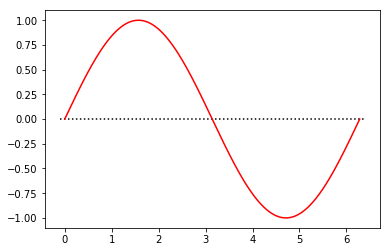

In [28]:
xlist = np.linspace(0,2*np.pi,1000)

plt.plot([-0.1,0.1+2*np.pi],[0,0], 'k:') #검은색으로 x 축 표시 
plt.plot(xlist, [Dsin(0,x) for x in xlist], 'r-') # y=sin(x)의 그래프 

## 이 부분에 적당한 코드를 작성하시오. *************************************************
n=1
x=0 
N=0
while True:
    n=n+1
    for x in np.linspace(0,2*np.pi,1000):
        if abs(Dsin(0,x)-Taylor(n,x)) <= 1e-6:
            N=n
        else:
            break
    if N > 0 and abs(x-2*np.pi)< (2*np.pi/1000):
        break
              
print(N)

plt.plot(xlist, [Taylor(N,x) for x in xlist], 'b-')

# [문제 2: 배점 25점]

* 아래 코드의 딕셔너리 key1에 따라 encoding된 문자들이 hidden_text 넘파이 배열에 숨겨져 있다. 
* hidden_text에서 숨겨진 문자의 위치는 hint1 넘파이 배열과 hint2 넘파이 배열에서 동시에 1의 값을 갖는 위치이다.
* hidden_text에 숨겨진 문자를 이어 붙여서 만들어지는 문장을 구하시오. (단, 이어 붙이는 순서는 numpy 배열에서 reshape를 통해 rank를 바꿀 때 유지되는 데이타 순서이다.)

In [31]:
# 이 부분은 수정하지 말고 실행시키고, 다음 Cell에 필요한 코드를 작성하시오.

alphabet = 'a b c d e f g h i j k l m n o p q r s t u v w x y z _'.split(' ')
key1 = dict(zip(range(1,28),alphabet))

np.random.seed(3)

hint1 = np.random.randint(0,5,(30,30))
hint2 = np.random.randint(0,5,(30,30))

hidden_text = np.array([[14, 22, 20, 13,  3, 11, 26, 15,  5,  9, 12, 14, 14,  7, 13, 21,
        14,  8,  1, 10, 10,  7, 10, 24, 13, 24,  8, 10, 18, 26],
       [13,  7,  3, 26, 23,  4, 22, 26, 12, 21, 20, 16, 26,  6, 23,  3,
        17,  8, 24,  8, 12, 18, 18, 10, 21,  8, 15, 23,  5, 23],
       [19,  6,  1, 25,  1, 10, 23, 27, 22, 17, 27,  4, 20, 17, 27,  6,
        20, 19, 13,  5, 16, 17, 13,  9, 12, 10, 18, 22, 18, 16],
       [ 2,  3, 19, 18, 25, 11, 11, 26,  6, 13, 18, 27,  7, 11, 12, 12,
         1,  6,  7, 19, 23, 22, 19, 13,  8, 17, 22,  5,  1,  5],
       [22,  6, 22, 11, 14, 14, 13,  3, 16, 15, 19, 19, 14, 14,  6, 16,
         9,  2,  2, 19, 27,  8, 24,  5, 21, 19, 16, 22, 14, 25],
       [26, 16, 11,  5,  4, 24, 17, 26, 19, 24,  1, 19,  1, 19, 15,  1,
         8, 19, 22, 23,  7, 20, 19, 17, 19, 11, 20, 14,  5, 27],
       [27, 23, 11,  3, 20, 18, 24,  7,  6, 22, 16,  7, 14,  2, 12, 16,
        19, 26, 18, 25, 23, 21,  5, 20, 18, 27, 14, 13, 23, 20],
       [22, 15, 17, 21, 23, 13,  9, 21, 27,  7, 27, 12, 14,  2,  7, 18,
        25, 27, 21, 13, 19,  1,  7, 11, 21, 12, 11,  9, 19, 26],
       [22,  9, 17, 26,  9,  3,  7,  5, 16, 24, 13, 18, 10, 21,  8, 10,
        12, 14, 22, 20, 25, 27, 10, 20,  4,  6, 27,  1, 26, 10],
       [21, 20, 21, 20, 24, 23,  1, 19,  4, 20, 16, 20, 26, 25, 12,  2,
        19,  8, 27, 22, 15, 13, 11, 16, 13, 19,  7, 16,  3, 15],
       [ 2,  1,  5,  4, 12, 25, 20, 18,  8,  9,  9, 14,  7, 14, 14,  3,
         2,  1, 22, 14, 12,  4, 11,  9, 12, 16, 26, 16, 13, 21],
       [24, 22,  9, 25, 22,  2, 27, 26, 10, 25, 20,  9,  7,  6, 19, 13,
        15, 20,  5,  2, 27, 23, 13, 15, 20, 16, 18, 15, 18, 24],
       [ 9, 14,  9,  4, 27,  4, 24, 10, 19, 13,  3, 13, 26, 15, 14, 12,
        11, 18, 16, 26, 10,  3, 12, 13, 10, 25, 15,  5, 15,  5],
       [14, 16, 18, 10, 27, 13,  4, 21,  6, 22, 27, 10, 21, 10,  9,  9,
        15, 24,  3, 17,  3, 23,  2,  9,  9, 23,  2,  4, 27, 12],
       [ 4, 19, 19,  2, 27, 11, 18, 19,  7, 11, 14, 11,  5, 11, 23, 21,
         1,  9, 14, 11, 25,  5, 18,  7, 17, 14, 13, 14,  2, 13],
       [ 9, 14,  7, 11, 14,  9, 12, 26,  9, 27, 21, 26,  7, 20,  4, 21,
         1,  9,  4,  3, 12, 21, 21, 13, 16,  8, 23, 21, 19, 13],
       [15,  7,  6, 15, 23, 17, 17,  8, 18,  7,  5, 24, 15, 19, 11,  7,
        17,  3, 13, 21, 13, 22, 27, 20, 23, 27, 18, 22,  6, 22],
       [25,  4,  5, 25, 18, 10,  1,  9, 13,  1, 22, 10, 19, 26, 22,  5,
        26, 14, 13, 17, 26, 12, 20,  4, 12, 17, 21, 12,  6, 25],
       [21, 12, 18, 14,  7, 16,  6, 11, 18, 15, 11, 25, 21,  6, 13, 12,
         5, 15, 21,  1, 18,  1, 27,  7, 18,  8, 18, 25, 23, 15],
       [12, 19, 18, 22, 17, 25, 27, 15,  7, 12, 21, 18,  3,  4,  3, 16,
        25,  6, 24, 27,  3, 26,  5, 27,  1,  3, 26, 13, 16, 20],
       [15, 22, 10, 12, 12, 13,  9, 14,  6,  3,  9, 25,  3, 12, 23, 14,
        21, 21, 11,  4,  6, 18, 26,  9, 22,  8, 12,  6,  4, 22],
       [16, 14, 12, 19, 10,  6,  2,  8, 13, 14,  6, 25,  9,  5, 21,  5,
         1,  6, 27, 13,  1, 10,  4,  2,  1, 27, 18, 19, 27,  9],
       [14, 26,  7, 11, 27, 20,  8,  2, 27, 25, 14,  1,  4,  7,  9, 25,
        27,  5,  4,  5, 12, 15,  6, 24,  9, 24, 23, 15, 27,  2],
       [17,  6, 21, 19, 24, 22, 14,  4,  3, 27, 10,  6, 20, 19, 25, 12,
        27, 22,  2, 19, 23, 22,  2, 22, 27, 21, 27, 22, 15,  4],
       [18,  8, 26, 15, 21,  6,  3, 18,  1, 27, 12, 27,  6,  1, 19, 25,
         8, 15,  6, 18,  5, 17, 20, 23, 21, 13, 16, 17,  8, 11],
       [27, 20, 26, 13, 13, 10, 22, 25, 25, 23,  3, 13, 10, 18, 18,  1,
        24,  5,  8, 16,  3,  2,  8,  4, 19,  8, 13,  5, 13, 17],
       [ 9, 27, 27,  9, 14, 15, 22, 12, 27, 27, 11,  8,  2, 14, 25,  2,
        16, 22, 13, 18,  2, 17,  1,  4, 24, 26, 20, 21, 15, 15],
       [ 3,  8,  2, 11, 10, 20,  2,  9, 11, 11, 23, 20, 14,  1,  8, 19,
         9, 26, 16, 13, 12, 23, 22, 15, 25, 11, 19,  4, 22,  3],
       [ 3, 15, 27, 14,  3, 11, 17,  5,  7, 11, 24, 23,  8, 10,  5, 15,
        15, 17,  1, 21,  1, 23,  5, 25, 20, 14,  8, 27, 22,  9],
       [ 4,  9,  6,  7,  1, 16, 18, 10,  6,  1, 18, 13,  9, 21, 13,  3,
        24, 19, 24, 19, 20, 17, 15, 13, 14, 11, 27, 20, 13, 21]])

In [39]:
## 이 부분에 [문제2]의 풀이 코드를 작성하시오. *****************************************************
index1 =(hint1==1)
index2 =(hint2==1)
index3 =(index1 & index2)

Answer = hidden_text[index3]
list =[]
for i in range(0,len(Answer)):
    for j in range(1,28):
        if Answer[i]==j:
            list.append(key1[j])
print(list)

['t', 'r', 'u', 's', 't', '_', 'y', 'o', 'u', 'r', 's', 'e', 'l', 'f', '_', 'a', 'n', 'd', '_', 'd', 'o', '_', 'y', 'o', 'u', 'r', '_', 'b', 'e', 's', 't']


# [문제 3] 

## [문제 3-1: 배점 15점]

* 첨부된 flower.png 파일을 아래 코드에서 넘파이 배열 flower로 읽어들이시오. (flower.shape = (374, 665, 3)임)
* 넘파이 배열 flower에 SVD를 이용하여 n차 근사 배열(가장 큰 n개의 singular value와 left, right singular vector를 이용하여 만들어지는) 넘파이 배열flower2를 생성하는 함수 compress_with_loss 함수의 코드를 완성하시오. 
* 넘파이 배열 flower와 flower2의 shape는 같아야 하며, 각각 RGB color 그림 파일을 나타내는 배열이다.


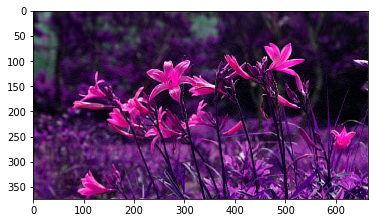

In [52]:
flower = plt.imread("flower.png")

## 힌트: 아래 코드에서 res_img를 작성할 때, np.concatenate 함수를 이용하시오.
def compress_with_loss(img, n):
    img_r = img[:,:,0]
    img_g = img[:,:,1]
    img_b = img[:,:,2]
    h,w,_ = img.shape
    img_T = img.T
    img_shape_zero = np.zeros_like(img_T)
    ur,sr,vr = np.linalg.svd(img_r)
    ug,sg,vg = np.linalg.svd(img_g)
    ub,sb,vb = np.linalg.svd(img_b)
    
    # img_r에 대한 SVD 결과로부터 재구성된 n차 근사 배열 
    rimg = np.dot(np.dot(ur[:,:n],np.diag(sr[:n])),vr[:n,:])
    rimg_return = (rimg.T).reshape(1,665,374)
    rimg_returning = rimg_return + img_shape_zero
    rimg_returned = rimg_returning.T
    rimg_returned[:,:,1] = np.zeros_like(img)[:,:,1]
    rimg_returned[:,:,2] = np.zeros_like(img)[:,:,2]
    # 이 부분을 작성하시오. *******************************
    
    # img_g에 대한 SVD 결과로부터 재구성된 n차 근사 배열 
    gimg = np.dot(np.dot(ug[:,:n],np.diag(sg[:n])),vg[:n,:])
    gimg_return = (gimg.T).reshape(1,665,374)
    gimg_returning = gimg_return + img_shape_zero
    gimg_returned = gimg_returning.T
    gimg_returned[:,:,0] = np.zeros_like(img)[:,:,0]
    gimg_returned[:,:,1] = np.zeros_like(img)[:,:,1]
    # 이 부분을 작성하시오. *******************************
    
    # img_b에 대한 SVD 결과로부터 재구성된 n차 근사 배열  
    bimg = np.dot(np.dot(ub[:,:n],np.diag(sb[:n])),vb[:n,:])
    bimg_return = (bimg.T).reshape(1,665,374)
    bimg_returning = bimg_return + img_shape_zero
    bimg_returned = bimg_returning.T
    bimg_returned = bimg_returning.T
    bimg_returned[:,:,0] = np.zeros_like(img)[:,:,0]
    bimg_returned[:,:,2] = np.zeros_like(img)[:,:,2]
    # 이 부분을 작성하시오. *******************************
    
    # rimg, gimg, bimg를 합쳐서 RGB 이미지를 나타내는 (374, 665, 3) shape 넘파이 배열 생성:res_img
    res_img = rimg_returned +bimg_returned +gimg_returned
    # 이 부분을 작성하시오. *******************************
    return np.clip(res_img,0,1) # 얻어진 r,g,b값이 0과 1사이의 값이 되도록 조절
plt.imshow(compress_with_loss(flower, 100))

## [문제 3-2: 배점 10점]

* 적당한 자연수 n에 대해 compress_with_loss(img, n)를 실행시켜 얻어지는 넘파일 배열을 flower2라 하자. 
* 넘파이 배열 flower와 flower2에 대해 각 성분의 차의 제곱의 합이 75보다 작아지는 n을 넘파이 배열의 연산을 이용하여 구하시오. (즉, $\sum_{i=0}^{373}\sum_{j=0}^{664}\sum_{k=0}^2 (\rm{flower}[i,j,k]-\rm{flower2}[i,j,k])^2$의 값을 넘파이 배열을 이용하여 구하고, 이 값이 75보다 작아지는 n을 구하시오.)
* 위 조건을 만족하는 n에 대해 구한 배열 flower2를 그림으로 나타내고, flower의 그림과 비교해보시오. 

In [49]:
## 이 부분에 [문제 3-2]의 풀이 코드를 작성하시오. **********************************

n=1
sum = 0

while True:
    flower2 = compress_with_loss(flower, n)
    for i in range(0,374):
        for j in range(0,665):
            for k in range(0,3):
                sum = sum + (flower[i,j,k] - flower2[i,j,k])**2
    if sum > 75:
        N = n
        break
plt.imshow(flower)
plt.imshow(compress_with_loss(flower, N))

KeyboardInterrupt: 

# [문제 4]

### [상황 설명]
* 아래에서 정의하는 Board 클래스는 rows 개의 행과 columns 개의 열을 갖는 격자를 생성한다.
* 클래스의 객체를 생성할 때 초기화과정에서 $\_randomly\_fill$ 함수에 의해 격자의 각 칸에는 1부터 4까지의 자연수가 랜덤하게 생성된다. (격자의 각 칸에 저장된 자연수 값의 정보는 넘파이 배열 $self.\_grid$에 저장된다.)
* 목표는 출발점(start)에서 목표점(goal)까지 다음 규칙에 따라 이동하는 경로를 BFS 알고리즘을 이용하여 구하는 것이다. (이동 규칙: 격자의 현재 위치(칸)에 적힌 숫자만큼 오른쪽 또는 아래쪽으로만 이동)
* 초기화에서 정의되는 $self.\_mark$는 $self.\_grid$와 동일한 구조를 갖는 이중 리스트로, 초기화 과정에서 각 칸에 $*$가 저장되고, BFS 알고리즘에 의해 path를 구하고 나면 mark함수를 통해 이동 경로가 저장된다.

* Node 클래스, node$\_$to$\_$path 함수, BFS 알고리즘을 구현한 bfs 함수는 수정없이 실행시켜 이용하시오.

## [문제 4-1: 15점]

* 아래 Board 클래스에서 이동 규칙에 맞게 successors 메소드를 작성하시오.

In [ ]:
Position = namedtuple('Position',('row', 'column'))


## 각 위치에 저장된 숫자만큼 이동하되, 오른쪽 또는 아래쪽으로만 이동
class Board:
    def __init__(self, rows = 10, columns = 10, seed = 1, 
                start = Position(0,0), goal = Position(9,9)):
        self._rows = rows
        self._columns = columns
        self.start = start
        self.goal = goal
        self._grid = np.zeros((rows,columns))
        
        self._randomly_fill(rows, columns, seed)
        
        self._mark = [['{:^3}'.format('*') for i in range(columns)] for j in range(rows)]
        
    def _randomly_fill(self, rows, columns, seed):
        np.random.seed(seed)
        self._grid[:rows-3, :columns-3] = np.random.randint(1,4,(rows-3, columns-3))
        self._grid[rows-3:, :columns-3] = np.random.randint(1,4,(3, columns-3))
        self._grid[:rows-3, columns-3:] = np.random.randint(1,4,(rows-3, 3))
        self._grid[rows-3:, columns-3:] = np.random.randint(1,3,(3,3))
        self._grid[rows-2:, columns-2:] = np.random.randint(1,2,(2,2))
        self._grid[rows-1,columns-1] = 0
        self._grid = self._grid.astype(int)
    def __str__(self):
        output = ""
        for row in range(self._rows):
            output += "| " + " | ".join(list(map(str,self._grid[row]))) + " |\n"
        output +="\n"
        for row in range(self._rows):
            output += "|" + "|".join([self._mark[row][i] for i in range(self._columns)]) + "|\n"
        
        return output
    
    def goal_test(self, P):   # P : Position
        return P == self.goal
    
    def successors(self, P): # P : Position
        locations = []
        ## 이 부분을 작성하시오. *****************************************************************
        
        return locations
    
    def mark(self, path):
        for (i, P) in enumerate(path): # P:Position
            self._mark[P.row][P.column] = 'm{:^2}'.format(i)
        
    def clear(self, path):
        for P in path:
            self._mark[P.row][P.column] = '{:^3}'.format('*')

In [ ]:
# 수정할 내용 없음: 실행만 시키면 됨 
class Node:
    def __init__(self, state, parent): #parent: Node (None일 수 있음)
        self.state = state
        self.parent = parent

def node_to_path(node):
    path = [node.state]
    while node.parent is not None:
        node = node.parent
        path.append(node.state)
    path.reverse()
    return path

In [ ]:
# 수정할 내용 없음: 실행만 시키면 됨 

def bfs(initial, goal_test, successors):
    frontier = []
    frontier.append(Node(initial, None))
    
    explored = {initial} # set
    
    while frontier:
        current_node = frontier.pop(0)
        current_state = current_node.state
        
        if goal_test(current_state):
            return current_node
        
        for child in successors(current_state):
            if child in explored:
                continue
            explored.add(child)
            frontier.append(Node(child, current_node))
    return None

## [문제 4-2: 배점 5점]

* 아래 코드로 생성된 Board 객체 problem의 start에서 goal까지 도달하는 path를 위에서 작성해 둔 bfs 함수와 node$\_$to$\_$path 함수를 이용하여 구하고, 
* problem 객체의 mark함수를 이용하여 problem.$\_$mark를 업데이트하고 프린트하여 확인하시오. 

In [ ]:
problem = Board(rows = 25, columns = 25, seed = 3, start = Position(0,0), goal = Position(24,24))

# print(problem)을 실행시켜서 어떻게 프린트되는지를 확인하는 것이 문제를 이해하는데 도움이 될 수 있습니다. 

## 이 부분을 작성하시오. *************************************************************

